In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import warnings
warnings.filterwarnings(action='once')
from helper_functions import *
%matplotlib inline

In [2]:
pip install pywaffle

Note: you may need to restart the kernel to use updated packages.


In [3]:
from pywaffle import Waffle

In [4]:
# error message because of mixed datatypes under some columns
data = pd.read_csv("state_NY.csv")
pd.set_option('display.max_columns', len(data.columns))
data.head()

/Users/jasonyang/opt/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3063: DtypeWarning: Columns (22,23,24,26,27,28,29,30,31,32,33,38,43,44) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,activity_year,lei,derived_msa-md,state_code,county_code,census_tract,conforming_loan_limit,derived_loan_product_type,derived_dwelling_category,derived_ethnicity,derived_race,derived_sex,action_taken,purchaser_type,preapproval,loan_type,loan_purpose,lien_status,reverse_mortgage,open-end_line_of_credit,business_or_commercial_purpose,loan_amount,loan_to_value_ratio,interest_rate,rate_spread,hoepa_status,total_loan_costs,total_points_and_fees,origination_charges,discount_points,lender_credits,loan_term,prepayment_penalty_term,intro_rate_period,negative_amortization,interest_only_payment,balloon_payment,other_nonamortizing_features,property_value,construction_method,occupancy_type,manufactured_home_secured_property_type,manufactured_home_land_property_interest,total_units,multifamily_affordable_units,income,debt_to_income_ratio,applicant_credit_score_type,co-applicant_credit_score_type,applicant_ethnicity-1,applicant_ethnicity-2,applicant_ethnicity-3,applicant_ethnicity-4,applicant_ethnicity-5,co-applicant_ethnicity-1,co-applicant_ethnicity-2,co-applicant_ethnicity-3,co-applicant_ethnicity-4,co-applicant_ethnicity-5,applicant_ethnicity_observed,co-applicant_ethnicity_observed,applicant_race-1,applicant_race-2,applicant_race-3,applicant_race-4,applicant_race-5,co-applicant_race-1,co-applicant_race-2,co-applicant_race-3,co-applicant_race-4,co-applicant_race-5,applicant_race_observed,co-applicant_race_observed,applicant_sex,co-applicant_sex,applicant_sex_observed,co-applicant_sex_observed,applicant_age,co-applicant_age,applicant_age_above_62,co-applicant_age_above_62,submission_of_application,initially_payable_to_institution,aus-1,aus-2,aus-3,aus-4,aus-5,denial_reason-1,denial_reason-2,denial_reason-3,denial_reason-4,tract_population,tract_minority_population_percent,ffiec_msa_md_median_family_income,tract_to_msa_income_percentage,tract_owner_occupied_units,tract_one_to_four_family_homes,tract_median_age_of_housing_units
0,2019,549300W2DSERWC01YR18,39100,NY,36071.0,3.607101e+10,C,Conventional:First Lien,Single Family (1-4 Units):Site-Built,Not Hispanic or Latino,Joint,Female,1,0,2,1,1,1,1111,1111,1111,525000.0,Exempt,Exempt,Exempt,3,Exempt,Exempt,Exempt,Exempt,Exempt,Exempt,Exempt,Exempt,1111,1111,1111,1111,Exempt,1,2,1111,1111,1,Exempt,309.0,Exempt,1111,1111,2.0,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,2,2,5.0,27.0,NaN,NaN,NaN,5.0,NaN,NaN,NaN,NaN,2,2,2,2,2,2,65-74,65-74,Yes,Yes,1111,1111,1111,NaN,NaN,NaN,NaN,10,NaN,NaN,NaN,4894,31.53,96700,117,1378,1715,32
1,2019,549300W2DSERWC01YR18,39100,NY,36071.0,3.607101e+10,C,Conventional:First Lien,Single Family (1-4 Units):Site-Built,Not Hispanic or Latino,White,Joint,1,0,2,1,1,1,1111,1111,1111,355000.0,Exempt,Exempt,Exempt,2,Exempt,Exempt,Exempt,Exempt,Exempt,Exempt,Exempt,Exempt,1111,1111,1111,1111,Exempt,1,1,1111,1111,1,Exempt,124.0,Exempt,1111,1111,2.0,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,2,2,5.0,NaN,NaN,NaN,NaN,5.0,NaN,NaN,NaN,NaN,2,2,1,2,2,2,25-34,<25,No,No,1111,1111,1111,NaN,NaN,NaN,NaN,10,NaN,NaN,NaN,7540,16.31,96700,111,2074,2689,36
2,2019,549300W2DSERWC01YR18,39100,NY,36071.0,3.607101e+10,C,Conventional:First Lien,Single Family (1-4 Units):Site-Built,Not Hispanic or Latino,White,Joint,1,3,2,1,1,1,1111,1111,1111,445000.0,Exempt,Exempt,Exempt,3,Exempt,Exempt,Exempt,Exempt,Exempt,Exempt,Exempt,Exempt,1111,1111,1111,1111,Exempt,1,1,1111,1111,1,Exempt,196.0,Exempt,1111,1111,2.0,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,2,2,5.0,NaN,NaN,NaN,NaN,5.0,NaN,NaN,NaN,NaN,2,2,1,2,2,2,35-44,35-44,No,No,1111,1111,1111,NaN,NaN,NaN,NaN,10,NaN,NaN,NaN,5073,13.60,96700,150,1554,1952,33
3,2019,549300W2DSERWC01YR18,39100,NY,36071.0,3.607101e+10,C,Conventional:First Lien,Single Family (1-4 Units):Site-Built,Not Hispanic or Latino,White,Male,1,0,2,1,1,1,1111,1111,1111,235000.0,Exempt,Exempt,Exempt,2,Exempt,Exempt,Exempt,Exempt,Exempt,Exempt,Exempt,Exempt,1111,1111,1111,1111,Exempt,1,1,1111,1111,1,Exempt,137.0,Exempt,1111,1111,2.0,NaN,NaN,NaN,NaN,5.0,NaN,NaN,NaN,NaN,2,4,5.0,NaN,NaN,NaN,NaN,8.0,NaN,NaN,NaN,NaN,2,4,1,5,2

In [5]:
data.shape

(570380, 99)

## Data Cleaning

### 1) Drop columns unrelated to analysis or goals

In [6]:
# all homes in dataset locted in NY and mortgage financed in 2019 -> drop msa in favor of more specific county code
data.drop(['activity_year', 'census_tract', 'state_code', 'derived_msa-md'], axis=1, inplace=True)

# analysis will rely on precise applicant race/ethnicity/sex and primry data rather than aggregated categories
data.drop(['derived_ethnicity', 'derived_race', 'derived_sex', 'applicant_ethnicity-2', 'applicant_ethnicity-3', 
            'applicant_ethnicity-4', 'applicant_ethnicity-5', 'co-applicant_ethnicity-2', 'co-applicant_ethnicity-3', 
            'co-applicant_ethnicity-4', 'co-applicant_ethnicity-5', 'applicant_race-2', 'applicant_race-3',
            'applicant_race-4', 'applicant_race-5', 'co-applicant_race-2', 'co-applicant_race-3',
            'co-applicant_race-4', 'co-applicant_race-5', 'derived_dwelling_category'], axis=1, inplace=True)

# drop columns reflecting whether applicant information was collected on the basis of visual observation/surname
data.drop(['applicant_ethnicity_observed', 'co-applicant_ethnicity_observed', 'applicant_race_observed',
            'co-applicant_race_observed', 'applicant_sex_observed', 'co-applicant_sex_observed'], axis=1, inplace=True)

# irrelevant to analysis goals
data.drop(['construction_method', 'submission_of_application', 'purchaser_type', 'tract_median_age_of_housing_units',
            'business_or_commercial_purpose', 'tract_one_to_four_family_homes', 'tract_owner_occupied_units',
            'manufactured_home_secured_property_type', 'manufactured_home_land_property_interest', 'reverse_mortgage',
           'applicant_age_above_62', 'co-applicant_age_above_62', 'tract_to_msa_income_percentage', 'tract_population'], axis=1, inplace=True)

# rely on initial information -> favor race over ethnicty as it is more specific
data.drop(['applicant_ethnicity-1', 'co-applicant_ethnicity-1', 'aus-2', 'aus-3', 'aus-4', 'aus-5', 'denial_reason-2',
           'denial_reason-3', 'denial_reason-4', 'co-applicant_credit_score_type'], axis=1, inplace=True)

# mortgage loan features not useful in analysis
data.drop(['aus-1', 'negative_amortization', 'other_nonamortizing_features', 'multifamily_affordable_units', 
            'initially_payable_to_institution', 'derived_loan_product_type', 'open-end_line_of_credit', 'rate_spread',
            'hoepa_status', 'prepayment_penalty_term', 'intro_rate_period', 'interest_only_payment', 'lien_status', 'balloon_payment'],
           axis=1, inplace=True)

`action_taken` column is a categorical variable consisting of: Loan originated(1), Application approved but not accepted(2), Application denied(3), Application withdrawn by applicant(4), File closed for incompleteness(5), Purchased loan(6), Preapproval request denied(7), Preapproval request approved but not accepted(8).
<br> 
Since this notebook will focus solely on approved or denied loans, we will drop all observations that is not of 'Loan origniaten', Application approved but not accepted', or 'Application denied'.

In [7]:
# drop all observations that is not of 'Loan originated', 'Application approved but not accepted' or 'Application denied'
loans = data[data['action_taken'].isin([1,2,3])].reset_index(drop=True)
loans

,lei,county_code,conforming_loan_limit,action_taken,preapproval,loan_type,loan_purpose,loan_amount,loan_to_value_ratio,interest_rate,total_loan_costs,total_points_and_fees,origination_charges,discount_points,lender_credits,loan_term,property_value,occupancy_type,total_units,income,debt_to_income_ratio,applicant_credit_score_type,applicant_race-1,co-applicant_race-1,applicant_sex,co-applicant_sex,applicant_age,co-applicant_age,denial_reason-1,tract_minority_population_percent,ffiec_msa_md_median_family_income
0,549300W2DSERWC01YR18,36071.0,C,1,2,1,1,525000.0,Exempt,Exempt,Exempt,Exempt,Exempt,Exempt,Exempt,Exempt,Exempt,2,1,309.0,Exempt,1111,5.0,5.0,2,2,65-74,65-74,10,31.53,96700
1,549300W2DSERWC01YR18,36071.0,C,1,2,1,1,355000.0,Exempt,Exempt,Exempt,Exempt,Exempt,Exempt,Exempt,Exempt,Exempt,1,1,124.0,Exempt,1111,5.0,5.0,1,2,25-34,<25,10,16.31,96700
2,549300W2DSERWC01YR18,36071.0,C,1,2,1,1,445000.0,Exempt,Exempt,Exempt,Exempt,Exempt,Exempt,Exempt,Exempt,Exempt,1,1,196.0,Exempt,1111,5.0,5.0,1,2,35-44,35-44,10,13.60,96700
3,549300W2DSERWC01YR18,36071.0,C,1,2,1,1,235000.0,Exempt,Exempt,Exempt,Exempt,Exempt,Exempt,Exempt,Exempt,Exempt,1,1,137.0,Exempt,1111,5.0,8.0,1,5,25-34,9999,10,43.56,96700
4,549300W2DSERWC01YR18,36071.0,C,1,2,1,31,195000.0,Exempt,Exempt,Exempt,Exempt,Exempt,Exempt,Exempt,Exempt,Exempt,1,1,133.0,Exempt,1111,3.0,3.0,1,2,65-74,55-64,10,65.52,96700
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
431267,549300MXJA09WZJ0DV55,36103.0,C,3,2,2,1,395000.0,95.0,NaN,NaN,NaN,NaN,NaN,NaN,360,405000,1,1,81.0,>60%,3,3.0,8.0,1,5,45-54,9999,1,71.97,124000
431268,549300MXJA09WZJ0DV55,36103.0,C,3,2,2,1,425000.0,96.5,NaN,NaN,NaN,NaN,NaN,NaN,360,435000,1,1,126.0,50%-60%,1,5.0,5.0,1,1,35-44,25-34,9,81.44,124000
431269,549300MXJA09WZJ0DV55,36059.0,C,3,2,3,32,395000.0,89.41,NaN,NaN,NaN,NaN,NaN,NaN,360,425000,1,1,81.0,42,2,3.0,8.0,1,5,45-54,9999,3,34.41,124000
431270,549300MXJA09WZJ0DV55,36103.0,C,1,2,1,1,285000.0,85.0,4.75,5128.6,NaN,1490.0,NaN,56.5,360,335000,1,1,75.0,45,2,5.0,8.0,1,5,25-34,9999,10,95.89,124000


### 2) Change lei code to appropriate lender institution name

In [8]:
# lei identifies a lender institution, we want to convert lei into institution names 
unique_lei = list(loans['lei'].unique())
unique_lei_dict = dict(zip(unique_lei, [None]*len(unique_lei))) 
dict(list(unique_lei_dict.items())[:10])  

{'549300W2DSERWC01YR18': None,
 '549300E3X7YDJIUENL65': None,
 '254900WTZC5SSKIN2M11': None,
 '5493003GQDUH26DNNH17': None,
 '254900791X4X11AYVA11': None,
 '5493005ZSV53K4M63M18': None,
 '5493002PPPIVY6G0AH03': None,
 '549300IL3HLQ2SW5VN73': None,
 '549300A0SVCQJPHVGV20': None,
 '5493002DRIX59V47NM65': None}

In [9]:
#  Converts lender lei code to institution name by API call.
#  Parameters:
#    lei - lender lei code to pass to API endpoint
#  Return value:
#    institution name associated with lei code
def get_bank_name(lei):
    import requests as rq
    URI = f"https://leilookup.gleif.org/api/v2/leirecords?lei={lei}"
    response = rq.get(URI)
    if response == 200:
        data = response.json()
    lei_data = response.json()
    res = [sub['Entity'] for sub in lei_data] 
    res2 = [sub['LegalName'] for sub in res]
    need = res2[0]
    return(need['$'])

In [10]:
# loop through lei dictionary and replace values with institution name
for k, v in unique_lei_dict.items():
    if v is None:
        unique_lei_dict[k] = get_bank_name(k)

In [11]:
# verify that API calls were successful -> each lei key has its respective institution name as the value. 
dict(list(unique_lei_dict.items())[:10])  

{'549300W2DSERWC01YR18': 'Walden Savings Bank',
 '549300E3X7YDJIUENL65': 'NUMARK CREDIT UNION',
 '254900WTZC5SSKIN2M11': 'First National Bank of America',
 '5493003GQDUH26DNNH17': 'NAVY FEDERAL CREDIT UNION',
 '254900791X4X11AYVA11': 'InFirst Federal Credit Union',
 '5493005ZSV53K4M63M18': 'HUDSON HERITAGE',
 '5493002PPPIVY6G0AH03': 'COMMUNITY RESOURCE FEDERAL CREDIT UNION',
 '549300IL3HLQ2SW5VN73': 'ASSOCIATED MORTGAGE BANKERS, INC.',
 '549300A0SVCQJPHVGV20': 'ALTRA',
 '5493002DRIX59V47NM65': 'LOS ANGELES POLICE Federal Credit Union'}

In [12]:
# map unique_lei_dict to our dataframe and rename column name -> 'lei' to 'lender'
loans['lei'] = loans['lei'].map(unique_lei_dict)
loans.rename({'lei': 'lender'}, axis=1, inplace=True)
loans.head()

,lender,county_code,conforming_loan_limit,action_taken,preapproval,loan_type,loan_purpose,loan_amount,loan_to_value_ratio,interest_rate,total_loan_costs,total_points_and_fees,origination_charges,discount_points,lender_credits,loan_term,property_value,occupancy_type,total_units,income,debt_to_income_ratio,applicant_credit_score_type,applicant_race-1,co-applicant_race-1,applicant_sex,co-applicant_sex,applicant_age,co-applicant_age,denial_reason-1,tract_minority_population_percent,ffiec_msa_md_median_family_income
0,Walden Savings Bank,36071.0,C,1,2,1,1,525000.0,Exempt,Exempt,Exempt,Exempt,Exempt,Exempt,Exempt,Exempt,Exempt,2,1,309.0,Exempt,1111,5.0,5.0,2,2,65-74,65-74,10,31.53,96700
1,Walden Savings Bank,36071.0,C,1,2,1,1,355000.0,Exempt,Exempt,Exempt,Exempt,Exempt,Exempt,Exempt,Exempt,Exempt,1,1,124.0,Exempt,1111,5.0,5.0,1,2,25-34,<25,10,16.31,96700
2,Walden Savings Bank,36071.0,C,1,2,1,1,445000.0,Exempt,Exempt,Exempt,Exempt,Exempt,Exempt,Exempt,Exempt,Exempt,1,1,196.0,Exempt,1111,5.0,5.0,1,2,35-44,35-44,10,13.60,96700
3,Walden Savings Bank,36071.0,C,1,2,1,1,235000.0,Exempt,Exempt,Exempt,Exempt,Exempt,Exempt,Exempt,Exempt,Exempt,1,1,137.0,Exempt,1111,5.0,8.0,1,5,25-34,9999,10,43.56,96700
4,Walden Savings Bank,36071.0,C,1,2,1,31,195000.0,Exempt,Exempt,Exempt,Exempt,Exempt,Exempt,Exempt,Exempt,Exempt,1,1,133.0,Exempt,1111,3.0,3.0,1,2,65-74,55-64,10,65.52,96700


### 3) New column indicating whether lender is a bank lender or non-bank lender 

In [13]:
# inititalize dict -> keys: unique institution values values: None
col_length = list(loans['lender'].unique())
lender_status = dict(zip(col_length, [None]*len(list(col_length)))) 
# view first 10 key, value of dict
dict(list(lender_status.items())[:10])

{'Walden Savings Bank': None,
 'NUMARK CREDIT UNION': None,
 'First National Bank of America': None,
 'NAVY FEDERAL CREDIT UNION': None,
 'InFirst Federal Credit Union': None,
 'HUDSON HERITAGE': None,
 'COMMUNITY RESOURCE FEDERAL CREDIT UNION': None,
 'ASSOCIATED MORTGAGE BANKERS, INC.': None,
 'ALTRA': None,
 'LOS ANGELES POLICE Federal Credit Union': None}

In [14]:
# data derived from Office of the Controller of the Currency
# - dataset lists all active national banks/federal savings association as of 7/31/2020 with ID info
bank = pd.read_csv("national_bank.csv")
bank.drop(['STATE', 'CITY', 'RSSD', "CHARTER NO"], axis=1, inplace=True)
# CERT(certificate number) is a unique identifier assigned to an institution
# - Using lender's CERT, it is a bank lender if CERT is present within this dataset
bank['CERT'] = bank['CERT'].astype(str)

In [15]:
for k, v in lender_status.items():
    if v is None:
        lei = list(unique_lei_dict.keys())[list(unique_lei_dict.values()).index(k)]
        cert = get_bank_cert(lei)
        if (cert+'.0') in list(bank['CERT'].values):
            lender_status[k] = 1
        else:
            lender_status[k] = 0    

In [16]:
# verfify lender type is updated
dict(list(lender_status.items())[:10])  

{'Walden Savings Bank': 0,
 'NUMARK CREDIT UNION': 0,
 'First National Bank of America': 1,
 'NAVY FEDERAL CREDIT UNION': 1,
 'InFirst Federal Credit Union': 0,
 'HUDSON HERITAGE': 0,
 'COMMUNITY RESOURCE FEDERAL CREDIT UNION': 0,
 'ASSOCIATED MORTGAGE BANKERS, INC.': 0,
 'ALTRA': 0,
 'LOS ANGELES POLICE Federal Credit Union': 0}

In [17]:
# national association bank dataset only accounts for federal branches and national banks. However, a majority of 
# loans within our dataset were applied via federal credit unions or state chartered banks that were not correctly
# identified as a bank lender. 
# - list below accounts for all banks that are bank lenders that were incorrectly labeled as non-bank lenders
#   due to uncovered data.
# correct lender status type for all banks in wrong_lender_type list that is stored in helper_functions.py
for k,v in lender_status.items():
    if k in wrong_lender_type_test:
        lender_status[k] = 1

In [18]:
# set 'type' column values equal to 'lender' column values to prep mapping
loans['type']=loans['lender']
# map lender_status dict to 'type' column indicating lender type
loans['type'] = loans['type'].map(lender_status)

In [19]:
# majority of our cloumns have values 'Exempt' that raises errors due to mixed dtypes -> replace with NaN
loans.replace('Exempt', np.NaN, inplace=True)
loans.head()

,lender,county_code,conforming_loan_limit,action_taken,preapproval,loan_type,loan_purpose,loan_amount,loan_to_value_ratio,interest_rate,total_loan_costs,total_points_and_fees,origination_charges,discount_points,lender_credits,loan_term,property_value,occupancy_type,total_units,income,debt_to_income_ratio,applicant_credit_score_type,applicant_race-1,co-applicant_race-1,applicant_sex,co-applicant_sex,applicant_age,co-applicant_age,denial_reason-1,tract_minority_population_percent,ffiec_msa_md_median_family_income,type
0,Walden Savings Bank,36071.0,C,1,2,1,1,525000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,1,309.0,NaN,1111,5.0,5.0,2,2,65-74,65-74,10,31.53,96700,1
1,Walden Savings Bank,36071.0,C,1,2,1,1,355000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,1,124.0,NaN,1111,5.0,5.0,1,2,25-34,<25,10,16.31,96700,1
2,Walden Savings Bank,36071.0,C,1,2,1,1,445000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,1,196.0,NaN,1111,5.0,5.0,1,2,35-44,35-44,10,13.60,96700,1
3,Walden Savings Bank,36071.0,C,1,2,1,1,235000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,1,137.0,NaN,1111,5.0,8.0,1,5,25-34,9999,10,43.56,96700,1
4,Walden Savings Bank,36071.0,C,1,2,1,31,195000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,1,133.0,NaN,1111,3.0,3.0,1,2,65-74,55-64,10,65.52,96700,1


### 4) Check proportion of null values -> drop columns over 80% threshold

In [20]:
# function to calculate sum of null values and percentage of null values to data as whole
def missing_values_table(df): 
    miss_vals = df.isnull().sum()
    miss_vals_percent = round((miss_vals/len(df))*100,2)
    miss_vals_table = pd.concat([miss_vals, miss_vals_percent], axis=1)
    miss_vals_table_cols = miss_vals_table.rename(columns={0: 'Missing Values', 1: '% of All Values'})
    return(miss_vals_table_cols)

missing_values_table(loans)

,Missing Values,% of All Values
lender,0,0.00
county_code,2509,0.58
conforming_loan_limit,5922,1.37
action_taken,0,0.00
preapproval,0,0.00
loan_type,0,0.00
loan_purpose,0,0.00
loan_amount,0,0.00
loan_to_value_ratio,37268,8.64
interest_rate,121977,28.28


**Observation:** Within our dataframe, there are a few variables with null values that may hinder our analysis. As null vlaues for `total_points_and_fees`, `discount_points`, and `lender_credits` compute a majority of our observations, we will drop these variables and seek to impute the null values that make up less than 80% of a variable.

In [21]:
# drop specified columns as null values consitututes >80% of data
loans.drop(['total_points_and_fees', 'discount_points', 'lender_credits'], axis=1, inplace=True)

### 5) map string value of applicant race to appropriate columns and change dtype

In [22]:
# race columns originally house categorical values representing race -> map to string value of race
loans['applicant_race-1'] = loans['applicant_race-1'].map(races)
loans['co-applicant_race-1'] = loans['co-applicant_race-1'].map(races)

In [23]:
# from info above, convert object dtype to either int64/float64 -> data more flexible to work with
loans['loan_to_value_ratio'] = loans['loan_to_value_ratio'].astype(float).round(2)
loans['interest_rate'] = loans['interest_rate'].astype(float).round(2)
loans['total_loan_costs'] = loans['total_loan_costs'].astype(float).round(2)
loans['total_loan_costs'] = loans['total_loan_costs'].astype(float).round(2)
loans['origination_charges'] = loans['origination_charges'].astype(float).round(2)
loans['loan_term'] = loans['loan_term'].astype(float).round(2)
loans['property_value'] = loans['property_value'].astype(float).round(2)

### 6) Map custom bins to debt_to_income column for order and consistency

In [24]:
def map_dti_perc_bins(df):
    """Map integer debt to income ratios to a bin."""
    df = df.copy()
    dti_str_list = []
    for dti in df["debt_to_income_ratio"].unique():
        if not isinstance(dti, float) and dti.isdigit():
            dti_str_list.append(dti)

    dti_int_list = [int(dti) for dti in dti_str_list]
    perc_range = f"{min(dti_int_list)}%-{max(dti_int_list)}%"
    df = df.reset_index().rename({"Index": "debt_to_income_ratio"})
    df["debt_to_income_ratio"].replace(dti_str_list, perc_range, inplace=True)
#     df = sort_dti_bins(df)
    return df

In [25]:
loans = map_dti_perc_bins(loans)

### 6) Examine `interest_rate` column as it will be an area of analysis

In [26]:
loans['interest_rate'].describe()

count    309295.000000
mean          4.340984
std           1.418259
min           0.000000
25%           3.620000
50%           4.120000
75%           4.880000
max         439.000000
Name: interest_rate, dtype: float64

**Observation:** Using the describe function, we can easily identify there are extreme outliers within the data as indicated with a maximum value of 439.00. We can deduce this value is infeasible for an interest rate and in fact, any value over 10% can be deemed extreme. These values can negatively impat the accuracy of our analysis revovling around interest rates and thus, we will drop outliers using quartiles and IQR. 

In [27]:
q1 = loans['interest_rate'].quantile(0.25)
q3 = loans['interest_rate'].quantile(0.75)
iqr = q3-q1
mask = (loans['interest_rate'] < (q1 - 1.5 * iqr)) | (loans['interest_rate'] > (q3 + 1.5 * iqr))
loans[mask] = np.nan

In [28]:
loans['interest_rate'].describe()

count    295642.000000
mean          4.234766
std           0.864899
min           1.740000
25%           3.620000
50%           4.120000
75%           4.750000
max           6.770000
Name: interest_rate, dtype: float64

**Observation:** Our data is significantly more accurate and reliable with the exclusion of outliers. Note our maximum interest rate is 6.77%.

In [29]:
#data ready for in-depth analysis
loans.head()

,index,lender,county_code,conforming_loan_limit,action_taken,preapproval,loan_type,loan_purpose,loan_amount,loan_to_value_ratio,interest_rate,total_loan_costs,origination_charges,loan_term,property_value,occupancy_type,total_units,income,debt_to_income_ratio,applicant_credit_score_type,applicant_race-1,co-applicant_race-1,applicant_sex,co-applicant_sex,applicant_age,co-applicant_age,denial_reason-1,tract_minority_population_percent,ffiec_msa_md_median_family_income,type
0,0.0,Walden Savings Bank,36071.0,C,1.0,2.0,1.0,1.0,525000.0,NaN,NaN,NaN,NaN,NaN,NaN,2.0,1,309.0,NaN,1111.0,White,White,2.0,2.0,65-74,65-74,10.0,31.53,96700.0,1.0
1,1.0,Walden Savings Bank,36071.0,C,1.0,2.0,1.0,1.0,355000.0,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1,124.0,NaN,1111.0,White,White,1.0,2.0,25-34,<25,10.0,16.31,96700.0,1.0
2,2.0,Walden Savings Bank,36071.0,C,1.0,2.0,1.0,1.0,445000.0,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1,196.0,NaN,1111.0,White,White,1.0,2.0,35-44,35-44,10.0,13.60,96700.0,1.0
3,3.0,Walden Savings Bank,36071.0,C,1.0,2.0,1.0,1.0,235000.0,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1,137.0,NaN,1111.0,White,NaN,1.0,5.0,25-34,9999,10.0,43.56,96700.0,1.0
4,4.0,Walden Savings Bank,36071.0,C,1.0,2.0,1.0,31.0,195000.0,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1,133.0,NaN,1111.0,Black,Black,1.0,2.0,65-74,55-64,10.0,65.52,96700.0,1.0


## Exploratory Data Analysis

In [30]:
# dataframe of approved loans -> loans originated or loans approved but not originated
approved = loans[loans['action_taken'].isin(['1','2'])].reset_index(drop=True)
approved.head()

,index,lender,county_code,conforming_loan_limit,action_taken,preapproval,loan_type,loan_purpose,loan_amount,loan_to_value_ratio,interest_rate,total_loan_costs,origination_charges,loan_term,property_value,occupancy_type,total_units,income,debt_to_income_ratio,applicant_credit_score_type,applicant_race-1,co-applicant_race-1,applicant_sex,co-applicant_sex,applicant_age,co-applicant_age,denial_reason-1,tract_minority_population_percent,ffiec_msa_md_median_family_income,type
0,0.0,Walden Savings Bank,36071.0,C,1.0,2.0,1.0,1.0,525000.0,NaN,NaN,NaN,NaN,NaN,NaN,2.0,1,309.0,NaN,1111.0,White,White,2.0,2.0,65-74,65-74,10.0,31.53,96700.0,1.0
1,1.0,Walden Savings Bank,36071.0,C,1.0,2.0,1.0,1.0,355000.0,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1,124.0,NaN,1111.0,White,White,1.0,2.0,25-34,<25,10.0,16.31,96700.0,1.0
2,2.0,Walden Savings Bank,36071.0,C,1.0,2.0,1.0,1.0,445000.0,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1,196.0,NaN,1111.0,White,White,1.0,2.0,35-44,35-44,10.0,13.60,96700.0,1.0
3,3.0,Walden Savings Bank,36071.0,C,1.0,2.0,1.0,1.0,235000.0,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1,137.0,NaN,1111.0,White,NaN,1.0,5.0,25-34,9999,10.0,43.56,96700.0,1.0
4,4.0,Walden Savings Bank,36071.0,C,1.0,2.0,1.0,31.0,195000.0,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1,133.0,NaN,1111.0,Black,Black,1.0,2.0,65-74,55-64,10.0,65.52,96700.0,1.0


In [31]:
# understand nature of approved df -> null values
missing_values_table(approved)

,Missing Values,% of All Values
index,0,0.00
lender,0,0.00
county_code,613,0.20
conforming_loan_limit,5319,1.72
action_taken,0,0.00
preapproval,0,0.00
loan_type,0,0.00
loan_purpose,0,0.00
loan_amount,0,0.00
loan_to_value_ratio,24829,8.04


**Observation:** There appears to substantial null values under `total_loan_costs`, `origination_charges`, and `co-applicant_race` that reflect unprovided information, but nonetheless should be cognizant of throughout this analysis

In [32]:
# initial understanding of approved df central tendencies -> some column summaries missing due to mixed dtypes
approved.describe()

,index,county_code,action_taken,preapproval,loan_type,loan_purpose,loan_amount,loan_to_value_ratio,interest_rate,total_loan_costs,origination_charges,loan_term,property_value,occupancy_type,income,applicant_credit_score_type,applicant_sex,co-applicant_sex,denial_reason-1,tract_minority_population_percent,ffiec_msa_md_median_family_income,type
count,308888.000000,308275.000000,308888.000000,308888.000000,308888.000000,308888.000000,3.088880e+05,284059.000000,295642.000000,220645.000000,219265.000000,292276.00000,2.938500e+05,308888.000000,290992.000000,308888.000000,308888.000000,308888.000000,308888.000000,308888.000000,308888.000000,308888.000000
mean,216564.548461,36067.474875,1.044181,1.964961,1.177469,12.570967,4.461158e+05,72.253681,4.234766,5964.999202,2340.077591,319.13090,8.779131e+05,1.177203,176.390158,45.826102,1.539383,3.552899,33.115126,28.306461,88757.732252,0.613779
std,126958.740007,31.860426,0.205498,0.183878,0.478629,14.535182,3.265844e+06,193.666997,0.864899,5789.055645,3379.798182,78.83517,7.770585e+06,0.540135,594.584430,212.331275,0.754218,1.632984,157.846524,27.375257,20200.863679,0.486883
min,0.000000,34005.000000,1.000000,1.000000,1.000000,1.000000,5.000000e+03,0.090000,1.740000,0.000000,0.000000,1.00000,5.000000e+03,1.000000,-660.000000,1.000000,1.000000,1.000000,10.000000,0.000000,0.000000,0.000000
25%,106945.750000,36047.000000,1.000000,2.000000,1.000000,1.000000,1.150000e+05,59.920000,3.620000,3080.590000,673.000000,360.00000,2.050000e+05,1.000000,70.000000,1.000000,1.000000,2.000000,10.000000,8.260000,76900.000000,0.000000
50%,214574.500000,36065.000000,1.000000,2.000000,1.000000,2.000000,2.350000e+05,76.970000,4.120000,4625.790000,1203.000000,360.00000,3.950000e+05,1.000000,107.000000,3.000000,1.000000,5.000000,10.000000,17.800000,79300.000000,1.000000
75%,328613.250000,36091.000000,1.000000,2.000000,1.000000,31.000000,4.250000e+05,87.730000,4.750000,7203.830000,2622.500000,360.00000,6.650000e+05,1.000000,168.000000,7.000000,2.000000,5.000000,10.000000,36.940000,96700.000000,1.000000
max,431271.000000,36123.000000,2.000000,2.000000,4.000000,32.000000,1.000005e+09,77358.490000,6.770000,734719.990000,146795.000000,720.00000,1.600005e+09,3.000000,131810.000000,1111.000000,6.000000,6.000000,1111.000000,100.000000,124000.000000,1.000000


**Observation:** At a glance, the average applicant income for those approved is approximately $174,000 and a mean interest rate of 4.34%.

In [33]:
# dataframe of approved loans -> loans originated or loans approved but not originated
denied = loans[loans['action_taken']==3].reset_index(drop=True)
denied.head()

,index,lender,county_code,conforming_loan_limit,action_taken,preapproval,loan_type,loan_purpose,loan_amount,loan_to_value_ratio,interest_rate,total_loan_costs,origination_charges,loan_term,property_value,occupancy_type,total_units,income,debt_to_income_ratio,applicant_credit_score_type,applicant_race-1,co-applicant_race-1,applicant_sex,co-applicant_sex,applicant_age,co-applicant_age,denial_reason-1,tract_minority_population_percent,ffiec_msa_md_median_family_income,type
0,17.0,Walden Savings Bank,36071.0,C,3.0,2.0,1.0,1.0,175000.0,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1,134.0,NaN,1111.0,Asian,NaN,1.0,5.0,45-54,9999,1.0,44.58,96700.0,1.0
1,29.0,Walden Savings Bank,36111.0,C,3.0,2.0,1.0,4.0,95000.0,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1,48.0,NaN,1111.0,White,NaN,2.0,5.0,55-64,9999,3.0,16.82,83300.0,1.0
2,34.0,Walden Savings Bank,36071.0,C,3.0,2.0,1.0,4.0,55000.0,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1,97.0,NaN,1111.0,White,White,1.0,2.0,55-64,45-54,1.0,20.65,96700.0,1.0
3,36.0,Walden Savings Bank,36105.0,C,3.0,2.0,1.0,1.0,165000.0,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1,51.0,NaN,1111.0,White,NaN,1.0,5.0,25-34,9999,3.0,40.58,66200.0,1.0
4,38.0,Walden Savings Bank,36071.0,C,3.0,2.0,1.0,4.0,45000.0,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1,147.0,NaN,1111.0,Black,Black,2.0,1.0,45-54,45-54,4.0,29.47,96700.0,1.0


In [34]:
# understand nature of denied df -> null values
missing_values_table(denied)

,Missing Values,% of All Values
index,0,0.00
lender,0,0.00
county_code,1471,1.35
conforming_loan_limit,496,0.46
action_taken,0,0.00
preapproval,0,0.00
loan_type,0,0.00
loan_purpose,0,0.00
loan_amount,0,0.00
loan_to_value_ratio,11156,10.26


**Observation:** Given that this dataframe reflects loan applications that were denied, `interest_rate`, `total_loan_costs`, and `origination_charges` are null as expected, for these attributes are only associated with approved loans. We'll proceed to drop these null columns from our dataframe in addition to `co-applicant_race`.

In [35]:
denied.drop(['interest_rate', 'total_loan_costs', 'origination_charges', 'co-applicant_race-1'], axis=1, inplace=True)

## Scope: 

The United States economy is largely dependent on the mortgage industry; the two are so intricately linked, movement in one can directly cause a change in the other. Historically, most individuals know mortgages to be originated from traditional banking institutions. However, non-bank lenders have risen dramatically within the last decade to meet the demands of homebuyers as well as to disrupt the mortgage process.
<br><br>
Non-bank lenders are financial institutions that do not offer full-fledged banking services such as lending and depositing services but offer diverse home financing routes. They have left expanding footprints on the home mortgage process, hoping to make the process easier and more efficient. 
<br><br>
This analysis seeks to discover why non-bank lenders are more appealing to some applicants and the pros and cons associated with working through  non-bank lenders versus traditional bank lenders.

**Let's first examine the proportion of non-bank lenders and bank lenders within our dataset**

In [36]:
# dictionary representing proportion of lender type -> 1:bank lender, 0:non-bank lender
prop_dict = loans['type'].value_counts().to_dict()
prop_dict

{1.0: 274501, 0.0: 143118}

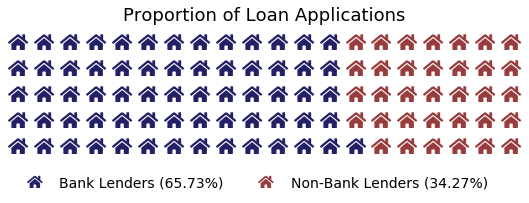

In [37]:
data = {'Bank Lenders': round(prop_dict[1]/sum(prop_dict.values())*100, 2),
        'Non-Bank Lenders': round(prop_dict[0]/sum(prop_dict.values())*100, 2)}

fig = plt.figure(
    FigureClass=Waffle, 
    rows=5, 
    values=data, 
    title={
        'label': 'Proportion of Loan Applications',
        'loc': 'center',
        'fontdict': {
            'fontsize': 18
        }
    },
    colors=("#232066", "#983D3D"),
    labels=[f"{k} ({round(v / sum(data.values()) * 100,2)}%)" for k, v in data.items()],
    legend={'loc': 'lower left', 'bbox_to_anchor': (0, -0.4), 'ncol':len(data),'framealpha': 0,
        'fontsize': 14},
    icons='home', icon_size=18, 
    icon_legend=True,
    figsize=(8,6)
)

**Observation:** Out of the 431,272 prospective home buyers in New York State, 65.74% utilized traditional bank lenders while 34.26% utilized non-bank lenders. While bank lenders still account for two-thirds of all applications, the popularity of non-bank lenders is evident as it makes up over one-third of all applications. This signals that a majority of home buyers are becoming increasingly knowledgeable in their options when it comes to mortgages and are aware that mortgages do not only originate in banks, which is traditionally known to be the case. <br> <br>
Several factors could contribute to this proportion we observe; the first being that bank lenders are generally much more accessible to home buyers than non-bank lenders. For example, bank lender giants such as JPMorgan Chase & Co and Bank of America have 5,000 and 4,300 financial branches respectively across the United States. When pitted against a non-bank lender such as Better Mortgage Corportion, which typically is of smaller scale, bank lenders have much greater presence and ability to attract home buyers. The deep-rooted knowledge most Americans have on the home-buying process generally leads them to the traditional bank route, as their institution for personal banking matters becomes the most accessible financial institution to originate their loan. 
<br> <br>
On the other hand, the rise of non-bank lenders can partially be accredited to the technological evolution we have been experiencing in the past decade. Home buyers no longer have to visit their local bank branch to obtain a loan. The rise of the Internet and optimal search engines have given home buyers easy access to other choices right at their fingertips. With a simple Google search, home buyers are able to "shop" around for the best deal, not only on their homes, but on the mortgage buying process. Non-bank lenders can easily excel in this arena because most are structured to be more technologically advanced and are also very customer service based, wanting to make the entire process as easy as possible. This is usually not the case when it comes to bank loaners, who are confined by traditional processes and the bureaucratic process of approving loans. Buying a home is stressful as it is, so the appeal of non-bank lenders with their various perks can be very attractive.

**A mortgage interste rate is one of the most important factor for an applicant when determining if a loan is right for them. As so, let's examine the average interest rate between bank lenders and non-bank lenders.**

In [38]:
# dataframe represents approved loans via bank lender institutions
bank_lender = approved[approved['type']==1].reset_index(drop=True)
bank_lender.head()

,index,lender,county_code,conforming_loan_limit,action_taken,preapproval,loan_type,loan_purpose,loan_amount,loan_to_value_ratio,interest_rate,total_loan_costs,origination_charges,loan_term,property_value,occupancy_type,total_units,income,debt_to_income_ratio,applicant_credit_score_type,applicant_race-1,co-applicant_race-1,applicant_sex,co-applicant_sex,applicant_age,co-applicant_age,denial_reason-1,tract_minority_population_percent,ffiec_msa_md_median_family_income,type
0,0.0,Walden Savings Bank,36071.0,C,1.0,2.0,1.0,1.0,525000.0,NaN,NaN,NaN,NaN,NaN,NaN,2.0,1,309.0,NaN,1111.0,White,White,2.0,2.0,65-74,65-74,10.0,31.53,96700.0,1.0
1,1.0,Walden Savings Bank,36071.0,C,1.0,2.0,1.0,1.0,355000.0,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1,124.0,NaN,1111.0,White,White,1.0,2.0,25-34,<25,10.0,16.31,96700.0,1.0
2,2.0,Walden Savings Bank,36071.0,C,1.0,2.0,1.0,1.0,445000.0,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1,196.0,NaN,1111.0,White,White,1.0,2.0,35-44,35-44,10.0,13.60,96700.0,1.0
3,3.0,Walden Savings Bank,36071.0,C,1.0,2.0,1.0,1.0,235000.0,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1,137.0,NaN,1111.0,White,NaN,1.0,5.0,25-34,9999,10.0,43.56,96700.0,1.0
4,4.0,Walden Savings Bank,36071.0,C,1.0,2.0,1.0,31.0,195000.0,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1,133.0,NaN,1111.0,Black,Black,1.0,2.0,65-74,55-64,10.0,65.52,96700.0,1.0


In [39]:
# dataframe represents approved loans via non-bank lender institutions
non_bank_lender = approved[approved['type']==0].reset_index(drop=True)
non_bank_lender.head()

,index,lender,county_code,conforming_loan_limit,action_taken,preapproval,loan_type,loan_purpose,loan_amount,loan_to_value_ratio,interest_rate,total_loan_costs,origination_charges,loan_term,property_value,occupancy_type,total_units,income,debt_to_income_ratio,applicant_credit_score_type,applicant_race-1,co-applicant_race-1,applicant_sex,co-applicant_sex,applicant_age,co-applicant_age,denial_reason-1,tract_minority_population_percent,ffiec_msa_md_median_family_income,type
0,2552.0,"ASSOCIATED MORTGAGE BANKERS, INC.",36005.0,C,1.0,1.0,1.0,1.0,585000.0,85.0,5.00,6758.84,2416.60,360.0,685000.0,1.0,2,106.0,36%-49%,7.0,Asian,Asian,1.0,2.0,45-54,35-44,10.0,96.67,79300.0,0.0
1,2553.0,"ASSOCIATED MORTGAGE BANKERS, INC.",36103.0,C,1.0,1.0,2.0,1.0,355000.0,NaN,5.12,18348.44,9438.28,360.0,365000.0,1.0,1,83.0,50%-60%,7.0,White,NaN,1.0,5.0,35-44,9999,10.0,81.44,124000.0,0.0
2,2554.0,"ASSOCIATED MORTGAGE BANKERS, INC.",36081.0,C,1.0,1.0,1.0,1.0,785000.0,80.0,4.88,17283.84,12320.00,360.0,985000.0,1.0,2,308.0,30%-<36%,7.0,Asian,Asian,1.0,2.0,35-44,35-44,10.0,94.42,79300.0,0.0
3,2555.0,"ASSOCIATED MORTGAGE BANKERS, INC.",36103.0,C,1.0,1.0,2.0,1.0,405000.0,NaN,5.12,15369.73,4504.30,360.0,415000.0,1.0,1,90.0,50%-60%,7.0,White,NaN,2.0,5.0,45-54,9999,10.0,37.44,124000.0,0.0
4,2556.0,"ASSOCIATED MORTGAGE BANKERS, INC.",36119.0,C,1.0,1.0,1.0,1.0,585000.0,80.0,5.00,5209.11,1485.00,360.0,725000.0,1.0,1,261.0,36%-49%,7.0,White,NaN,1.0,5.0,35-44,9999,10.0,26.74,79300.0,0.0


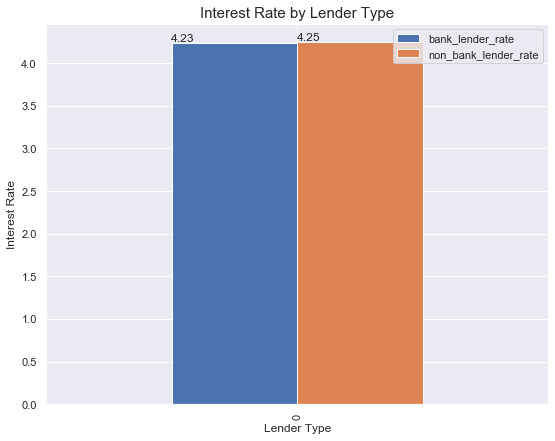

In [40]:
cols = ['bank_lender_rate', 'non_bank_lender_rate']
index = [0]
interest_rate_df = pd.DataFrame(index=index, columns=cols)
interest_rate_df['bank_lender_rate'] = round(bank_lender['interest_rate'].mean(), 2)
interest_rate_df['non_bank_lender_rate'] = round(non_bank_lender['interest_rate'].mean(), 2)
sns.set(style="darkgrid")
ax = interest_rate_df.plot(kind='bar', figsize=(9,7));

# place column/interest rate value on bars
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.005, p.get_height() * 1.005))

plt.xlabel('Lender Type');
plt.ylabel('Interest Rate');
plt.title("Interest Rate by Lender Type", fontsize=15);

**Observation:** Within the world of mortgages, everyone wants to boast of the lowest interest rate to bring in more home-buyers. In actuality, the average is not that far off comparing the two lender types with the bank lender having a marginally lower rate.
<br><br>
The question that arises is, who would benefit more from which type of loan? What does this mean to borrowers when they are looking for a mortgage? - short answer is that they have to lay out all the characteristics they have whether it's their credit, circumstances, market, home value, etc. to see where they can acquire the best deal. 
<br><br>
The long answer will mean a deeper dive into the types of applicants who go to each type of lender. The similar interest rate amongst the two can be because the preconditions individuals possess before they go to the lender. For instance, an individual with amazing credit, low debt-to-income ratio, more knowledge of the process, or anything else involved with the process, will very likely be able to obtain a lower interest rate at a traditional bank lender. Then the question becomes: will this same individual obtain an even lower rate at a non-bank lender? And vice versa for the buyers who went with the non-bank lenders?

In [41]:
# unique race values -> ['White', 'Hawaiian/Pacific', 'Asian', 'Black', 'N/A']
races_list = list(set(races.values()))

# make seperate df for bar chart
columns = ['Bank Lender', 'Non-bank Lender']
interest_rate_df = pd.DataFrame(index= races_list, columns=columns)

# values for 'Bank Lender' column
interest_rate_df['Bank Lender']=races_list
bank_race_proportion = dict(zip(races_list, [None]*len(races_list))) 
for k,v in bank_race_proportion.items():
    race_copy = bank_lender[bank_lender['applicant_race-1']==k].copy()
    interest_mean = round(race_copy['interest_rate'].mean(),2)
    bank_race_proportion[k] = interest_mean
interest_rate_df['Bank Lender'] = interest_rate_df['Bank Lender'].map(bank_race_proportion)

# values for 'Non-bank Lender' column
interest_rate_df['Non-bank Lender']=races_list
non_bank_race_proportion = dict(zip(races_list, [None]*len(races_list))) 
for k,v in non_bank_race_proportion.items():
    race_copy = non_bank_lender[non_bank_lender['applicant_race-1']==k].copy()
    interest_mean = round(race_copy['interest_rate'].mean(),2)
    non_bank_race_proportion[k] = interest_mean
interest_rate_df['Non-bank Lender'] = interest_rate_df['Non-bank Lender'].map(non_bank_race_proportion)

interest_rate_df

,Bank Lender,Non-bank Lender
N/A,4.06,4.22
Asian,4.16,4.33
Hawaiian/Pacific,4.61,4.25
Black,4.32,4.32
White,4.26,4.24


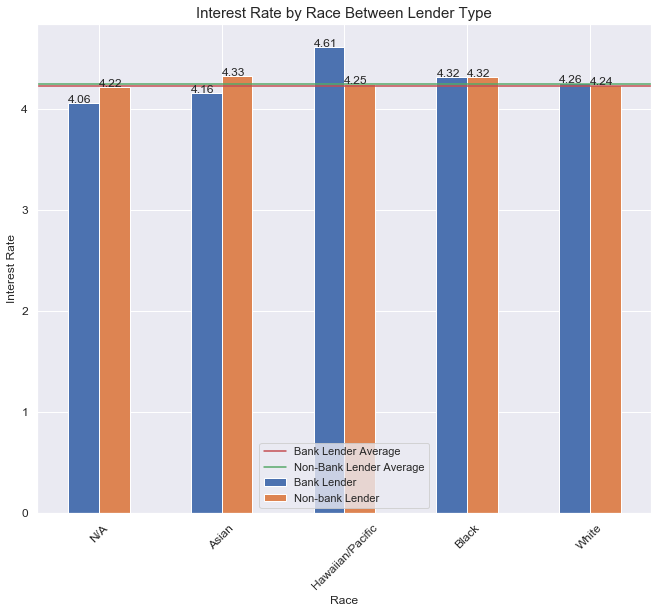

In [42]:
ax =interest_rate_df.plot(kind="bar", figsize=(11,9));
plt.title("Interest Rate by Race Between Lender Type", fontsize=15);
plt.xlabel('Race');
plt.ylabel('Interest Rate');
plt.yticks(fontsize=12);
plt.xticks(rotation=45, fontsize=12);
plt.axhline(y=round(bank_lender['interest_rate'].mean(), 2), color='r', linestyle='solid', label='Bank Lender Average')
plt.axhline(y=round(non_bank_lender['interest_rate'].mean(), 2), color='g', linestyle='solid', label='Non-Bank Lender Average')
plt.legend()
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.00, p.get_height() * 1.00))

**Observation:** By graphing interest rates by race groups, White homebuyers have interest rates on par with the overall interest rate at 4.24%. Black homebuyers have the same interest rate average at both banks and non-bank lenders at 4.32%, which is .08% higher than the average. Both White and Black homebuyers have no significant difference between the types of lenders and rates they receive. Asian homebuyers experience lower interest rates than the average when they go through a traditional bank lender and a higher than average when they go through a non-bank by .17%. 
<br><br>
Like Figure 8, the data shown here shows that both banks and non-bank lenders are able to offer competitive rates. And the same questions exist: what pre-conditions lead homebuyers to go with a bank or a non-bank? Why do Black homebuyers experience higher rates on average? Why are the interest rates of non-bank and bank differ so significantly for Asians? 

**Comparing the distribution of different races across both `bank_lender` df and `non_bank_lender` df can better tell us if there is a certain demographic in the populaiton that may be more likely to finance with a non-bank lender or bank lender.**

In [43]:
# unique race values -> ['White', 'Hawaiian/Pacific', 'Asian', 'Black', 'N/A']
races_list = list(set(races.values()))

# make seperate df for bar chart
columns = ['Bank Lender', 'Non-bank Lender']
race_df = pd.DataFrame(index= races_list, columns=columns)

# values for 'Bank Lender' column
race_df['Bank Lender']=races_list
bank_race_proportion = (bank_lender['applicant_race-1'].value_counts(normalize=True)*100).to_dict()
race_df['Bank Lender'] = race_df['Bank Lender'].map(bank_race_proportion)

# values for 'Non-bank Lender' column
race_df['Non-bank Lender']=races_list
non_bank_race_proportion = (non_bank_lender['applicant_race-1'].value_counts(normalize=True)*100).to_dict()
race_df['Non-bank Lender'] = race_df['Non-bank Lender'].map(non_bank_race_proportion)

race_df

,Bank Lender,Non-bank Lender
N/A,15.438062,15.619709
Asian,9.318336,6.980000
Hawaiian/Pacific,0.233183,0.197824
Black,4.074893,8.804842
White,70.935527,68.397626


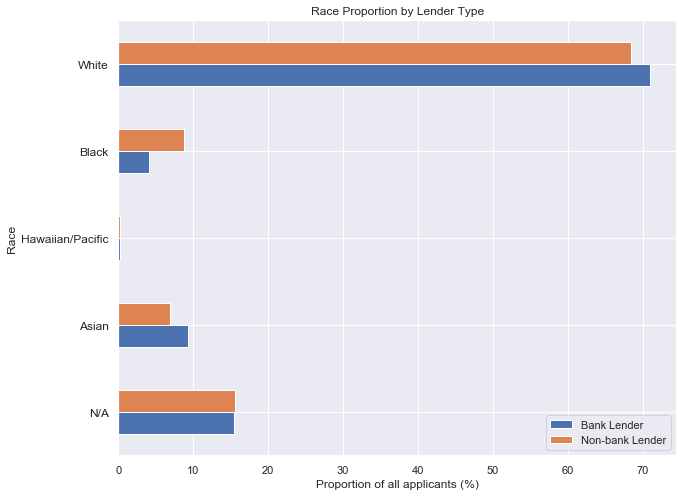

In [44]:
ax = race_df.plot(kind="barh", figsize=(10,8));
plt.title("Race Proportion by Lender Type");
plt.xlabel('Proportion of all applicants (%)');
plt.ylabel('Race');
plt.yticks(fontsize=12);

**Observation:** Given this barplot and as stated above, there is an evident lack of representation of Hawaiian/Paific applicants which will hinder our analysis regarding that race group. Nonetheless, we see that more Asian and White applicants apply for loans via bank lenders. When considering our prior observation that roughly two-thirds of applicants apply via bank lenders, the difference in percentage, show that Asian and White applicants apply vai non-bank lenders at a rate that is higher than 34.26%. For Black applicants, non-bank applicants double that of bank appplicants. 
<br> <br>
Apart from Black applicants, we observe a similar distribution amongst bank lenders and non-bank lenders. An appealing characterisitc of non-bank lenders is their flexibility and willingness to work with applicants who's credit or income is low. Let's see if this is actually the case and how income and race influences which path an applicant pursues.

In [45]:
# income bins to sort and group applicants' income
bins = [0,50, 100, 150, 200, 250, 300, 330000]
# group income observations into appropriate bin
loans['binned_income'] = pd.cut(loans['income'], bins)
# view and verify grouping executed as expected
loans.head()

,index,lender,county_code,conforming_loan_limit,action_taken,preapproval,loan_type,loan_purpose,loan_amount,loan_to_value_ratio,interest_rate,total_loan_costs,origination_charges,loan_term,property_value,occupancy_type,total_units,income,debt_to_income_ratio,applicant_credit_score_type,applicant_race-1,co-applicant_race-1,applicant_sex,co-applicant_sex,applicant_age,co-applicant_age,denial_reason-1,tract_minority_population_percent,ffiec_msa_md_median_family_income,type,binned_income
0,0.0,Walden Savings Bank,36071.0,C,1.0,2.0,1.0,1.0,525000.0,NaN,NaN,NaN,NaN,NaN,NaN,2.0,1,309.0,NaN,1111.0,White,White,2.0,2.0,65-74,65-74,10.0,31.53,96700.0,1.0,"(300, 330000]"
1,1.0,Walden Savings Bank,36071.0,C,1.0,2.0,1.0,1.0,355000.0,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1,124.0,NaN,1111.0,White,White,1.0,2.0,25-34,<25,10.0,16.31,96700.0,1.0,"(100, 150]"
2,2.0,Walden Savings Bank,36071.0,C,1.0,2.0,1.0,1.0,445000.0,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1,196.0,NaN,1111.0,White,White,1.0,2.0,35-44,35-44,10.0,13.60,96700.0,1.0,"(150, 200]"
3,3.0,Walden Savings Bank,36071.0,C,1.0,2.0,1.0,1.0,235000.0,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1,137.0,NaN,1111.0,White,NaN,1.0,5.0,25-34,9999,10.0,43.56,96700.0,1.0,"(100, 150]"
4,4.0,Walden Savings Bank,36071.0,C,1.0,2.0,1.0,31.0,195000.0,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1,133.0,NaN,1111.0,Black,Black,1.0,2.0,65-74,55-64,10.0,65.52,96700.0,1.0,"(100, 150]"


In [46]:
# binned_income is of type float, we want to represent as an interval and this dict allows us to map values
bin_map = {
    0:'0',
    50:"(0,50]",
    100:"(50,100]",
    150:"(100,150]",
    200:"(150,200]",
    250:"(200,250]",
    300:"(250,300]",
    330000:"(300,330000]"
}

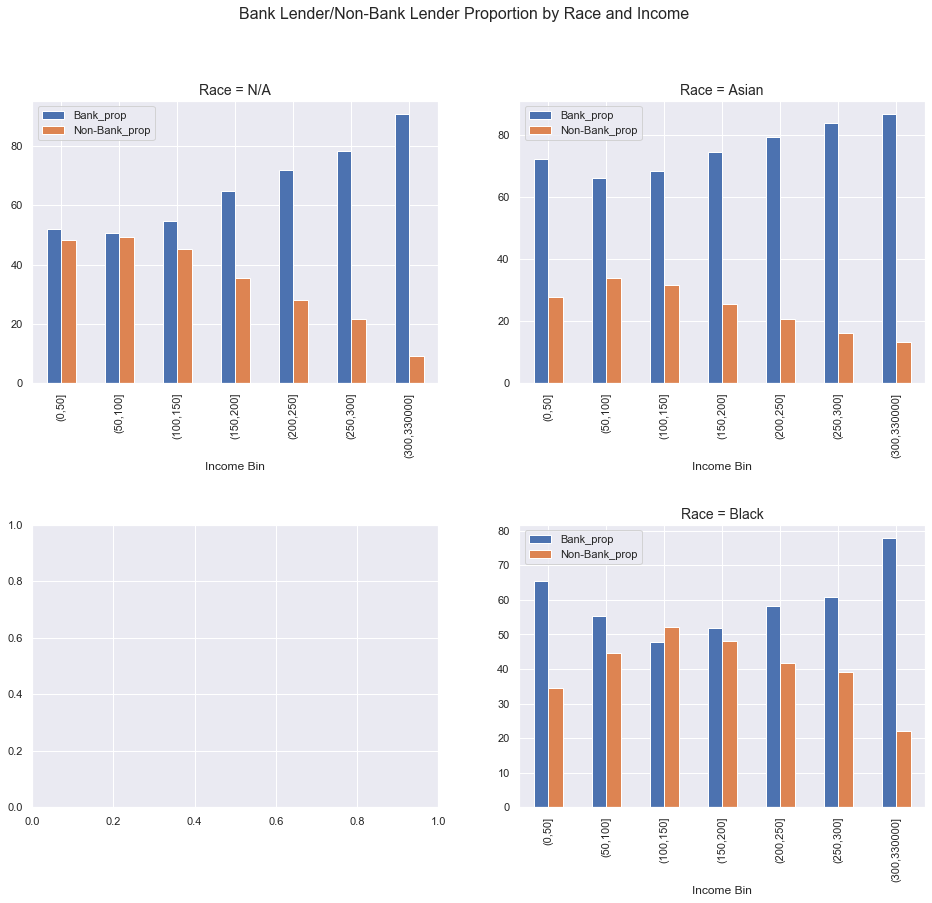

In [47]:
# cluster charts into 2x2 for direct comparison purposes  -> code below sets up visualization format
nrows = 2
ncols = 2
figures, axes = plt.subplots(nrows = nrows,ncols = ncols, figsize=(16, 13))
axes = axes.flatten()
plt.subplots_adjust(hspace=0.5)
plt.suptitle('Bank Lender/Non-Bank Lender Proportion by Race and Income', fontsize=16)

for race, axis in zip(races_list, axes):
    # exclude Hawaiian/Pacific due to lack of representative data
    if race != 'Hawaiian/Pacific':
        # df storing rows of selected race
        df = loans[loans['applicant_race-1']==race].copy()
        # bank df stores all bank lender applications
        bank = df[df['type']==1].copy()
        # store values to map into df column
        bank_values = bank['binned_income'].value_counts().to_dict()
        
        # non_bank df stores all non-bank applications
        non_bank = df[df['type']==0].copy()
        # store values to map into df column
        non_bank_values = non_bank['binned_income'].value_counts().to_dict()
        
        # columns for df to plot
        columns = ['Income Bin', 'Bank Lender', 'Non-Bank Lender']
        # build df to map and plot values
        race_income_df = pd.DataFrame(columns=columns)        
        # fill columns with income bin values to prepare mapping
        race_income_df['Income Bin'] = bins
        race_income_df['Bank Lender'] = bins
        race_income_df['Non-Bank Lender'] = bins
        
        # map appropriate dict to respective columns
        race_income_df['Bank Lender'] = race_income_df['Bank Lender'].map(bank_values)
        race_income_df['Non-Bank Lender'] = race_income_df['Non-Bank Lender'].map(non_bank_values)
        race_income_df['Income Bin'] = race_income_df['Income Bin'].map(bin_map)
        # exclude first row as it represents income of 0
        race_income_df.drop(race_income_df.index[0], inplace=True)
        
        # want each bar to be normalized in respect to its bin and not overall distribution
        race_income_df['Total Applicant']= race_income_df.sum(axis=1)
        race_income_df['Bank_prop'] = round((race_income_df['Bank Lender']/race_income_df['Total Applicant'])*100,2)
        race_income_df['Non-Bank_prop'] = round((race_income_df['Non-Bank Lender']/race_income_df['Total Applicant'])*100,2)

        huh = race_income_df[['Income Bin', 'Bank_prop', 'Non-Bank_prop']].copy()
        
        # plot df for each race
        huh.set_index('Income Bin').plot(kind='bar', grid=True, ax=axis).set_title('Race = {}'.format(str(race)), fontsize=14);
#         plt.xticks(rotation=45, fontsize=12);

**Observation:** The clustered bar charts above provide insight into how income and race influences an applicant's decision to finance with a bank lender or non-bank lender. Keeping in mind that bank lenders consitutues two-thirds of all applicants and the data is processed in which each income bin is normalized to 100%, we expect to see every Orange bar (Non-Bank) hovering around 34% and every Blue bar (Bank) hovering around 66%. This is visually expressed when the Orange bar (Non-Bank) is half the height of the Blue bar (Bank). This is our basis for comparison across income bins as Blue/Orange bars that do not meet our expected distribution of 66/33 signifies there is a bias higher proportion of bank lenders or non-bank lenders that is directly correlated to race or income.
<br><br>
**Asian:** Examining Asian appplicants, we see that applicants whose income ranges from \\$50k to \\$150k adheres to our expected observation, that non-bank lenders constitutues 33% of the data within the bin and bank lenders 66%. When we look at polar ends, our expectation does not hold as the distribution is more extreme. For Asians whose incomes range below \\$50k, 73% financed with Bank lenders and 27% with Non-Bank lenders. This shows that Asians whose income is below \\$50k finance with Bank lenders at a 7% higher rate than the overall distribution. On the opposite end, as income increases from \\$150k, more than 66% of each income bin finance with bank lenders. We see that across all income bins, Asians either finance with bank lenders at our expected 66% rate that increases in relation to income. 
<br><br>
**White:** For White applicants, we can observe a similar distribution to Asians but with slight differences across bins. Appplicants' whose income are under \\$200k follows our expected distribution of roughly one-thirds non-bank lenders and two-thirds bank lenders. Unlike Asians who fall within the (0,50] income bin that reflected a higher proportion of bank lenders, this is not the case for White applicants under the same income bin. For incomes over \\$200k, White applicants finance with bank lenders at a rate higher than 66%, reaching as high as 85% disparity. Like the distribution of Asians, White distribution exhibits that across no income bins do we see non-bank lenders proportion exceed past its expected value of 34%. 
<br><br>
**Black:** Unlike our White and Asian applicants' data, the distribution of our Black applicants' data has greater variance amongst income bins. Black applicants whose income is below \\$50k meets our expected 66%-33% distribution, but non-bank lender percentages rises substantially as income rises. For Black applicants whose income falls between \\$100k and \\$200k, there is an obvious emphasis on non-bank lenders as approximately half of applicants within this income bin finance with non-bank lenders rather than just one-thirds. For incomes exceeding \\$200k, Black applicants still finance with non-bank lenders at a rate of 40%. This distribution is extremely practical in that it shows that within the housing demographic as a whole, Black applicants are much more likely to finance with non-bank lend
<br><br>
**Takeaway:** The distributions and charts illustrated above are practical in its ability to highlight certain trends and the financial routes expressed by different racial/income groups within the housing demographic. Black applicants are much more likely to finance with non-bank lenders, especially when their income falls between \\$50k-\\$250k. From this information, we may question why Black applicants finance with non-bank lenders at a much greater rate than Asians or Whites. For Asians and Whites, we see that as income falls below \\$100k, these applicants apply via non-bank lenders at our expected rate of 34% while those of higher income finance with bank lenders at a substantially higher rate. What is clear across all our distributions is that as income exceeds \\$200k, bank lenders consitute the majority of applicants regardless of race. We may acknowledge that such applicants with high incomes typically yield better credit scores and have higher chances of securing their approved desired loan. As such, the incentives that non-bank lenders offer such as competitive rates, higher loan amounts and leniency with credit may be irrelevant amongst higher income applciants. On the lower end of the income spectrum, these applicants have less income to cover debt and poses as much greater risk for lenders, but a prime marketing target for non-bank lenders. Let's proceed to examine approval rates by lender type and analyze whether lower income applicants with higher debt-to-income ratios really have approval rates with non-bank lenders. 

**At this point in the analysis, we know bank lenders comprise of two-thires of all New York mortgage applications and non-bank lenders constituting roughly one-thirds. However, as shown within our analysis above, the distributions based on `race` and `interest_rate` across both types of lenders are strikingly similar and do not effectively explain the differences between the two lenders and why non-bank lenders are becoming more appealing. Both lenders offer an average rate of 4.24% and when analyzing which demographic of applicants are more likely to finance with non-bank lenders, we see that applicants who are Black and are of middle to low income are the most likely to finance with non-bank lenders as over 50% of such applicants do so in comparison to our 34 across all races and incomes. Furthermore, Asians of low and high income finance with bank lenders at a higher rate whereas middle income Asians finance with bank lenders at our expected 66%. We also see that regardless of race, those with high income finance with bank lenders at a much greater rate than non-bank lenders. This information complements the role of non-bank lenders, that is, appealing to applicants of low-income and those with lack-luster credit while offerring similar interest rates and potentialy higher approval rates. On the topic of applicants' credit, A critical factor in determining an applicant's elgibility for loan approval is their `debt_to_income_ratio` (DTI), the percentage of a consumer's monthly gross income allocated towards debt payment. Lenders typically favor applicants with <36% DTI ratio and those over 50% DTI are classified as high risk applicants that typically result in higher interst rates, lower loan approval, or denial. <br><br>
Let's look at approval/denial percentages by lender type.**

In [48]:
# dataframe of loans via bank lenders 
bank_lender_approve = loans[loans['type']==1].copy()
# dict stores values of approved/denied loans -> 1,2(approved), 3(denied)
action_dict = bank_lender_approve['action_taken'].value_counts().to_dict()
action_dict

{1.0: 181724, 3.0: 84912, 2.0: 7865}

In [49]:
bank_approval_rate = round((action_dict[1]+action_dict[2])/(sum(action_dict.values()))*100,2)
bank_approval_rate

69.07

**Overall approval rating for bank lenders is 69.07%, repeat the same process for non-bank lenders.**

In [50]:
# dataframe of loans via non-bank lenders
non_bank_lender_approve = loans[loans['type']==0].copy()
# dict stores values of approved/denied loans -> 1,2(approved), 3(denied)
action_dict2 = non_bank_lender_approve['action_taken'].value_counts().to_dict()
action_dict2

{1.0: 113517, 3.0: 23819, 2.0: 5782}

In [51]:
non_bank_approval_rate = round((action_dict2[1]+action_dict2[2])/(sum(action_dict2.values()))*100,2)
non_bank_approval_rate

83.36

**Non-bank approval rate is 83.36% as compared to 69.07% of bank lenders.**

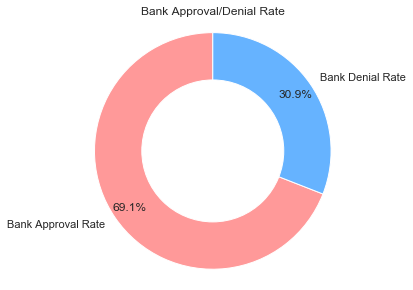

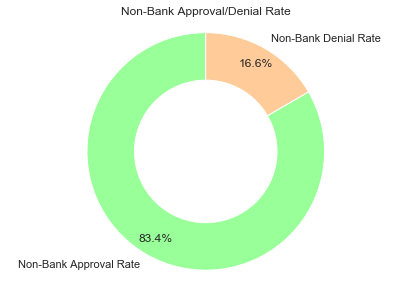

In [52]:
# Pie chart, where the slices will be ordered and plotted counter-clockwise:
labels = 'Bank Approval Rate', 'Bank Denial Rate'
# values taken from calculations made above
sizes = [bank_approval_rate, (100-bank_approval_rate)]
#add colors
colors = ['#ff9999','#66b3ff','#99ff99','#ffcc99']

fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=90,pctdistance=0.85)
centre_circle = plt.Circle((0,0),0.60,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.tight_layout()
plt.title("Bank Approval/Denial Rate")



# Pie chart, where the slices will be ordered and plotted counter-clockwise:
labels2 = 'Non-Bank Approval Rate', 'Non-Bank Denial Rate'
sizes2 = [non_bank_approval_rate, (100-non_bank_approval_rate)]
#add colors
colors2 = ['#99ff99','#ffcc99']

fig2, ax2 = plt.subplots()
ax2.pie(sizes2, labels=labels2, colors=colors2, autopct='%1.1f%%', startangle=90,pctdistance=0.85)
centre_circle = plt.Circle((0,0),0.60,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
ax2.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.tight_layout()
plt.title('Non-Bank Approval/Denial Rate')

plt.show()

**Observation:** At a glance, non-bank lenders approved 83.4% of all their applicants whereas bank lenders approved applicants at a lower rate of 69.1%. Likewise, bank lenders denied applicants more often than non-bank lenders, 30.9% to 16.6%. Given that both types of lenders offer competitive interest rates, non-bank lenders are more appealing as their acceptance rate is reflective of them accepting higher risk applicants with lack-luster credit.
<br><br>
Overall, banks approve less and reject more, which is expected given the characteristics of traditional corporation banks. Banks typically operate with a sense of bureaucracy in place that results in processing systems that are very lenient and common in larger banks such as JPMorgan CHase & Co or Bank of America. Home loans from such banks follow a inflexible processs where home buyers have to be cookie cutters to get the loan they want by matching neccessary income/debt ratios, credit, purchasing power, etc. This aspect may contribute to why Bank lender rates are slightly lower than non-bank lenders, as the entire package of these individuals who are predisposed to be approved at banks are already more attractice and know exactly what they need and what loans they cans secure before applying via a bank lender. 
<br><br>
On the other hand, non-bank lenders approve more and reject less. Given that the majority of such lenders are of small scale institutions that lack the influence big banks possess, they are more lenient in terms of working with a home buyer to ensure their business. By focusing more on serving the consumer, such banks are willing to work around factors that banks are less inclined to deal with. As llustrated in charts above, non-bank lenders are more popular amongst applicants of low income and their flexibility may attract consumers with subpar credit/income-debt ratio. Given non-bank lenders approve more and provide a chance of home ownership to applicants rejected by banks, their slightly higher interest rate may account for the larger risk they bear with these applciants. 

**Let's proceed to view acceptance/denial rate in respect to applicant debt-to-income ratio**

In [53]:
bank_lender["debt_to_income_ratio"].value_counts()

36%-49%     75999
20%-<30%    37491
30%-<36%    31747
<20%        14656
50%-60%      7988
>60%         2172
Name: debt_to_income_ratio, dtype: int64

**Approved loans: proportion of applicants in response to debt to income bins and lender type**

In [54]:
approved_cols = ['Bank Lender', 'Non-bank Lender']
# bins used as DTI indices for our df
approved = approved[approved["debt_to_income_ratio"].notnull()]
dti_col = "debt_to_income_ratio"
approved_bins = approved[dti_col].value_counts().index
approved_dti_df = pd.DataFrame(index=approved_bins, columns=approved_cols)
approved_dti_df['Bank Lender'] = approved_dti_df.join(bank_lender[dti_col].value_counts())[dti_col]
approved_dti_df['Non-bank Lender'] = approved_dti_df.join(non_bank_lender[dti_col].value_counts())[dti_col]

approved_dti_df 

,Bank Lender,Non-bank Lender
36%-49%,75999,61921
20%-<30%,37491,15340
30%-<36%,31747,16799
<20%,14656,4739
50%-60%,7988,11074
>60%,2172,1115


**Denied loans: proportion of applicants in response to debt to income bins and lender type**

In [55]:
denied_bank_lender = denied[denied['type']==1].reset_index(drop=True)
denied_non_bank_lender = denied[denied['type']==0].reset_index(drop=True)

cols2 = ['Bank Lender', 'Non-bank Lender']
bins2 = denied[dti_col].value_counts().index
denied_dti_df = pd.DataFrame(index=bins2, columns=cols2)
denied_dti_df['Bank Lender'] = denied_dti_df.join(denied_bank_lender[dti_col].value_counts())[dti_col]
denied_dti_df['Non-bank Lender'] = denied_dti_df.join(denied_non_bank_lender[dti_col].value_counts())[dti_col]

denied_dti_df

,Bank Lender,Non-bank Lender
>60%,27527,3977
36%-49%,19433,7918
50%-60%,12683,4078
20%-<30%,7194,1909
30%-<36%,6494,1925
<20%,4781,1367


**Join 2 dataframes above**

In [56]:
j_dti_df = approved_dti_df.join(denied_dti_df, rsuffix='_denied', lsuffix='_approved')
j_dti_df

,Bank Lender_approved,Non-bank Lender_approved,Bank Lender_denied,Non-bank Lender_denied
36%-49%,75999,61921,19433,7918
20%-<30%,37491,15340,7194,1909
30%-<36%,31747,16799,6494,1925
<20%,14656,4739,4781,1367
50%-60%,7988,11074,12683,4078
>60%,2172,1115,27527,3977


In [57]:
# create 4 columns filled with index as temporary placeholder
j_dti_df['Bank Approval %'] = j_dti_df.index
j_dti_df['Non-Bank Approval %'] = j_dti_df.index
j_dti_df['Bank Denial %'] = j_dti_df.index
j_dti_df['Non-Bank Denial %'] = j_dti_df.index
j_dti_df

,Bank Lender_approved,Non-bank Lender_approved,Bank Lender_denied,Non-bank Lender_denied,Bank Approval %,Non-Bank Approval %,Bank Denial %,Non-Bank Denial %
36%-49%,75999,61921,19433,7918,36%-49%,36%-49%,36%-49%,36%-49%
20%-<30%,37491,15340,7194,1909,20%-<30%,20%-<30%,20%-<30%,20%-<30%
30%-<36%,31747,16799,6494,1925,30%-<36%,30%-<36%,30%-<36%,30%-<36%
<20%,14656,4739,4781,1367,<20%,<20%,<20%,<20%
50%-60%,7988,11074,12683,4078,50%-60%,50%-60%,50%-60%,50%-60%
>60%,2172,1115,27527,3977,>60%,>60%,>60%,>60%


In [58]:
def calculate_percentage(df, col1, col2, col3):
    "calculates proportion given 3 columns -> engineered specifcally for j_dti_df dataframe"
    debt_bins = dict(zip(list(df.index), [None]*len(list(list(df.index))))) 
    approved = df[col1].to_dict()
    denied = df[col2].to_dict()
    for k, v in debt_bins.items():
        debt_bins[k] = round(approved[k]/(approved[k]+denied[k])*100,2)
    df[col3] = df[col3].map(debt_bins)
    return(df)

# call function that maps correct approval/denial percentages under each of 4 created columns
calculate_percentage(j_dti_df, 'Bank Lender_approved', 'Bank Lender_denied', 'Bank Approval %')
calculate_percentage(j_dti_df, 'Non-bank Lender_approved', 'Non-bank Lender_denied', 'Non-Bank Approval %')
calculate_percentage(j_dti_df, 'Bank Lender_denied', 'Bank Lender_approved', 'Bank Denial %')
calculate_percentage(j_dti_df, 'Non-bank Lender_denied', 'Non-bank Lender_approved', 'Non-Bank Denial %')

j_dti_df

,Bank Lender_approved,Non-bank Lender_approved,Bank Lender_denied,Non-bank Lender_denied,Bank Approval %,Non-Bank Approval %,Bank Denial %,Non-Bank Denial %
36%-49%,75999,61921,19433,7918,79.64,88.66,20.36,11.34
20%-<30%,37491,15340,7194,1909,83.90,88.93,16.10,11.07
30%-<36%,31747,16799,6494,1925,83.02,89.72,16.98,10.28
<20%,14656,4739,4781,1367,75.40,77.61,24.60,22.39
50%-60%,7988,11074,12683,4078,38.64,73.09,61.36,26.91
>60%,2172,1115,27527,3977,7.31,21.90,92.69,78.10


In [59]:
def sort_dti_bins(df, col):
    df = df.copy()
    custom_sort = {"<20%": 1,
                   "20%-<30%": 2,
                   "30%-<36%": 3,
                   "36%-49%": 4,
                   "50%-60%": 5,
                   ">60%": 6}
    df["dti_rank"] = df[col].map(custom_sort)
    df.sort_values(["dti_rank"], inplace=True)
    return df

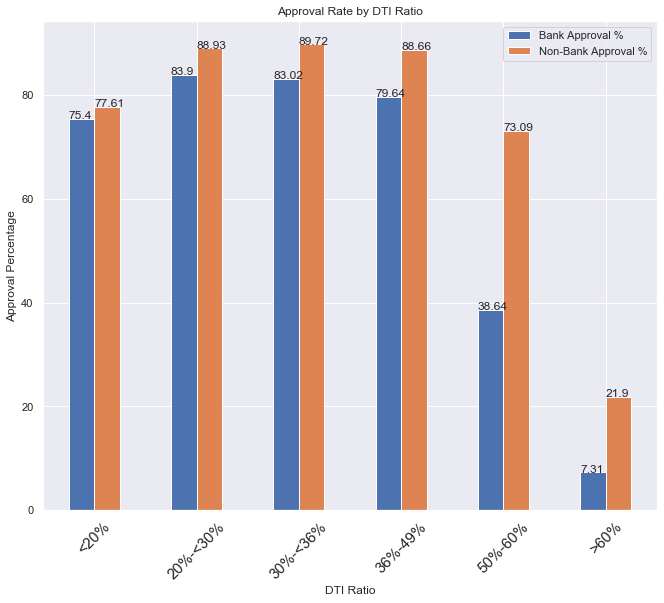

In [60]:
# rename index to bins--add new column representing bin category and sort
j_dti_df = j_dti_df.reset_index().rename({"index": dti_col}, axis=1)
j_dti_df = sort_dti_bins(df=j_dti_df, col=dti_col)
j_dti_df.set_index(dti_col, inplace=True)

# plot df using bar chart visualization
ax = j_dti_df[['Bank Approval %', 'Non-Bank Approval %']].plot(kind="bar", figsize=(11,9));

# place column/interest rate value on bars
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.00, p.get_height() * 1.00))
    
plt.xticks(rotation=45, fontsize=15);
plt.title('Approval Rate by DTI Ratio');
plt.xlabel('DTI Ratio');
plt.ylabel('Approval Percentage');

**Observation:** The two approval distributions between bank and non-bank lenders compare approval rates across different debt-to-income ratios. As introduced earlier, an applicant's debt-to-income ratio is the percentage of a consumer's onthly gross income allocated towards debt payment. DTI ratio is directly correlated with an applicant's credit with a higher DTI ratio signalling sub-par credit and lower ratio representing better credit. If the ratio is too high, lenders are less inclined to provide a loan or will do so at a much higher rate as there is a higher risk associated with repaying the loan. Following this statement, we see that both types of lenders approve aplicants at a similar rate when their DTI ratio is less than 20%. Lenders favor applicants with a DTI ratio under 36% and our distribution shows that for ratios between 20% and 36%, non-bank lenders approved on average 6% more applicants than bank lenders did. This disparity is even more extreme when considering DTI ratios greater than 50% which marks an applicant as high risk. Non-Bank lenders approval rate for applicants with 50%-60% DTI ratio was almost double that of Bank lenders and those deemed high risk of over 60%, non-bank lenders approval rate was three times that of bank lenders. The risk that banks lenders are willing to take is much lower than non-bank lenders when looking at approval rates with high risk applicants. In addition to our exploration on income, we see that applicants of low income and higher DTI ratios, which are correlated, are two to three times more likely to be approved under a non-bank lender. 

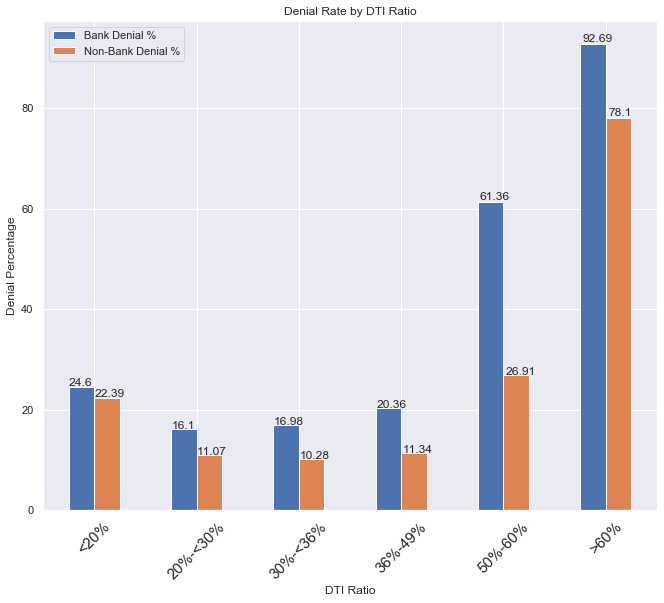

In [61]:
# plot bar chart for denial rates using denial columns
ax = j_dti_df[['Bank Denial %', 'Non-Bank Denial %']].plot(kind="bar", figsize=(11,9));

# place column/interest rate value on bars
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.005, p.get_height() * 1.005))
    
plt.xticks(rotation=45, fontsize=15);
plt.title('Denial Rate by DTI Ratio');
plt.xlabel('DTI Ratio');
plt.ylabel('Denial Percentage');

**Observation:** When visualizing denial rates by lender type across different DTI ration categories, our observation above is supported. For ratios under 50%, the denial rates between bank lenders and non-bank lenders were similarly distributed, but DTI ratios greater than 50% show a much greater denial rate by bank lenders. When looking solely at Bank lender denial rates, we see that the the majority of applcants whose DTI fall within 50% and 60% are denied while an astounding ~93% are denied when DTI is >60%. While non-bank lenders stil deny 78% of applicants within the >60% DTI bin, this denial rate is substantially lower than a bank lenders. In conclusion, we see strong evidence that suggests non-bank lenders are more appealing and a realistic route for those with higher DTI ratios or bad credit as such lenders are willingly to take on the risks. 

**What We Know So Far:** Our analysis to this point have shown that both types of lenders have very similar average interest rates and that non-bank lenders may be more appealing to applicants with sub-par credit or whose debt-to-income ratio is greater than 50%. Given a DTI ratio of 50%-60%, such applicants fare double the chances of approval and triple the chances of approval with >60% DTI when applying via a non-bank loan.

**Let's observe implications with race and income.**

In [62]:
# dict of value counts by race -> approved 
approved_race = approved['applicant_race-1'].value_counts().to_dict()
approved_race

{'White': 202336,
 'N/A': 37431,
 'Asian': 23547,
 'Black': 17036,
 'Hawaiian/Pacific': 652}

In [63]:
# dict of value counts by race -> denied
denied_race = denied['applicant_race-1'].value_counts().to_dict()
denied_race

{'White': 67438,
 'N/A': 19440,
 'Black': 11314,
 'Asian': 9473,
 'Hawaiian/Pacific': 995}

In [64]:
print("Denial Rate by Race:")

denial_rate={}
for k in denied_race:
    rate = round((denied_race[k]/(denied_race[k]+approved_race[k]))*100,2)
    # order of dict isnot guranteed -> find and set key
    denial_rate.setdefault(k,rate)

denial_rate

Denial Rate by Race:


{'White': 25.0,
 'N/A': 34.18,
 'Black': 39.91,
 'Asian': 28.69,
 'Hawaiian/Pacific': 60.41}

**`denial_rate` dictionary represents denial rate by each race.<br>
Income may be a confounding factor when examining denial rate by race, let's examine the mean income by race.**

In [65]:
# calculate mean income for each race group
income_dict = denial_rate.copy()
for k,v in income_dict.items():
    income_df = loans[loans['applicant_race-1']==k].reset_index(drop=True)
    income = round(income_df['income'].mean(),2)
    income_dict[k] = income

In [66]:
income_dict

{'White': 159.41,
 'N/A': 224.62,
 'Black': 111.11,
 'Asian': 162.02,
 'Hawaiian/Pacific': 109.0}

**Observation:** Out of the race groups that are identified, Asians recorded the highest average annual income at \\$162k and Blacks with the lowest average annual income at \\$111k.

In [67]:
# IDK WHAT THIS IS

approved_cols = ['Bank Lender', 'Non-bank Lender']
# bins used as DTI indices for our df
approved_bins = approved['debt_to_income_ratio'].value_counts().index
approved_dti_df = pd.DataFrame(index= approved_bins, columns=approved_cols)
approved_dti_df

,Bank Lender,Non-bank Lender
36%-49%,NaN,NaN
20%-<30%,NaN,NaN
30%-<36%,NaN,NaN
<20%,NaN,NaN
50%-60%,NaN,NaN
>60%,NaN,NaN


In [68]:
# columns for income dataframe
income_cols = ['Race', 'Denial Rate', 'Income']
income_df = pd.DataFrame(columns = income_cols)

# map dict values to appropriate columns
income_df['Race'] = list(income_dict.keys())
income_df['Income'] = income_df['Race']
income_df['Income'] = income_df['Income'].map(income_dict)
income_df['Denial Rate'] = income_df['Race']
income_df['Denial Rate'] = income_df['Denial Rate'].map(denial_rate)

income_df

,Race,Denial Rate,Income
0,White,25.00,159.41
1,N/A,34.18,224.62
2,Black,39.91,111.11
3,Asian,28.69,162.02
4,Hawaiian/Pacific,60.41,109.00


**We now have a dataframe that lists the denial rate and average annual income by each race group. To understand the variance of denial rates, we'll compare each rate to an overall denial rate benchmark.**

In [69]:
bench_mark = round((denied.shape[0]/loans.shape[0])*100,2)
bench_mark

25.21

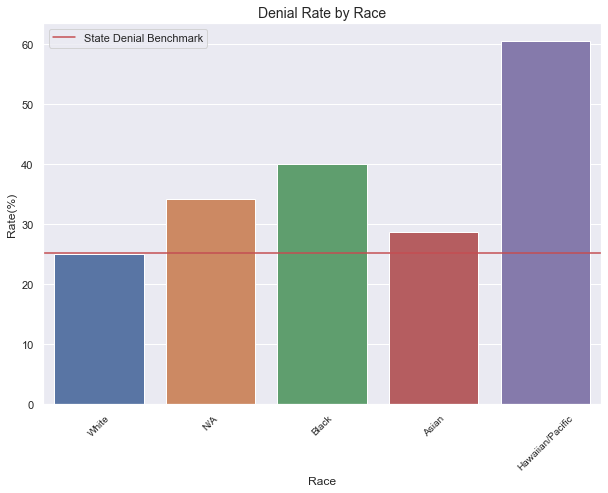

In [70]:
plt.figure(figsize=(10,7))
sns.set(style="darkgrid")
sns.barplot(income_df['Race'], income_df['Denial Rate'], edgecolor='white').set_title('Denial Rate by Race', fontsize=14)
plt.axhline(y=bench_mark, color='r', linestyle='solid', label='State Denial Benchmark')
plt.xlabel("Race")
plt.ylabel("Rate(%)")
plt.xticks(rotation=45, fontsize=10)
plt.legend()
plt.show()

**Observation:** With an overall denial rate of 25.21% across all races as indicated by the red horizontal line, we see that there are some races whose denial rate is greater than or less than the state average. With exception to Hawaiian/Pacific which we refrain from drawing conclusions from due to lack of data, observe that White applicants denial rate is slightly lower than that of the average. Black applicants experience the greatest disparity with a denial rate of 40% that is 15% over the state average. Next, we see Asians also experience a greater denial rate at 28%. Within the mortgage application process, an applicant is more likely given bad credit that is evident via high debt-to-income ratios. Higher debt-to-income ratio is typically a result of accruing debt despite a lower income. Let's examine if each races' average income is in line with its average denial rate. 

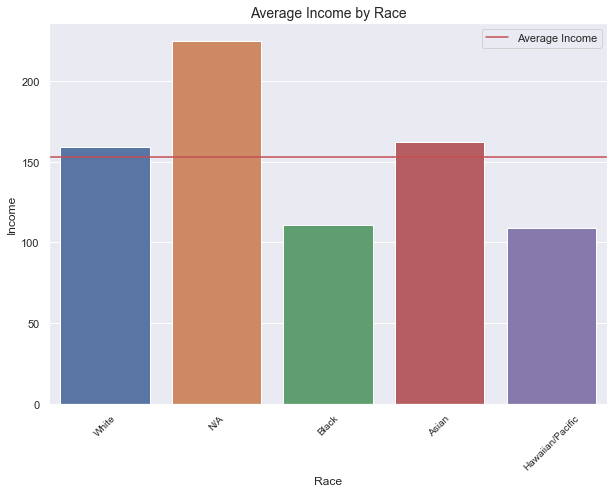

In [71]:
plt.figure(figsize=(10,7))
sns.set(style="darkgrid")
sns.barplot(income_df['Race'], income_df['Income'], edgecolor='white').set_title('Average Income by Race', fontsize=14)
plt.axhline(y=income_df['Income'].mean(), color='r', linestyle='solid', label='Average Income')
plt.xlabel("Race")
plt.ylabel("Income")
plt.xticks(rotation=45, fontsize=10)
plt.legend()
plt.show()

**Observation:** The chart above details the average income across our races. When coparing this chart to our denial rate chart directly above, we see that income is associated with denial rates. For White applicants, we see their average income is slightly above the overall average income and in relation, their denial rate sits slightly below the state denial benchmark. For Black applicants, their average income is approximately \\$40k below state average and in relation, their denial rate is 15% higher than the state average. In addition to our assumption that lower income results in higher debt-to-income ratios that in turn, increases denial rates, these charts highlight a strong association between income and denial rates that differ across races. White and Asian applicants have an average income hovering around the overall state income and in turn, their denial rates also hover aroung state denial rate averages. For Black applciants whose income is almost 33% lower than the state average, there is an evident increase in denial rates that suggests a strong crorrelaton between the two factors. 

**Let's proceed to examine whether these rates differ amongst bank lenders and non-bank lenders across different races.**

In [72]:
# list of races in our dataset
race_list = list(loans['applicant_race-1'].value_counts().to_dict())
# dict of races as keys initializes with None values
bank_race_dict = dict(zip(race_list, [None]*len(list(col_length))))
# copy dict for non-bank analysis
non_bank_race_dict = bank_race_dict.copy()
bank_race_dict

{'White': None,
 'N/A': None,
 'Asian': None,
 'Black': None,
 'Hawaiian/Pacific': None}

In [73]:
def denial_by_lender(race_dict, bank):
    for k,v in race_dict.items():    
        approval = approved[approved['type']==bank].reset_index(drop=True)
        approval_count = len(approval[approval['applicant_race-1'] == k])
        denial = denied[denied['type']==bank].reset_index(drop=True)
        denial_count = len(denial[denial['applicant_race-1'] == k])
        race_dict[k] = round(((denial_count)/(denial_count+approval_count)*100),2)
    return(race_dict)

In [74]:
bank_race_dict = denial_by_lender(bank_race_dict, 1)
bank_race_dict

{'White': 30.1,
 'N/A': 38.58,
 'Asian': 34.17,
 'Black': 53.63,
 'Hawaiian/Pacific': 68.15}

In [75]:
non_bank_race_dict = denial_by_lender(non_bank_race_dict, 0)
non_bank_race_dict

{'White': 14.83,
 'N/A': 27.59,
 'Asian': 14.41,
 'Black': 22.32,
 'Hawaiian/Pacific': 25.25}

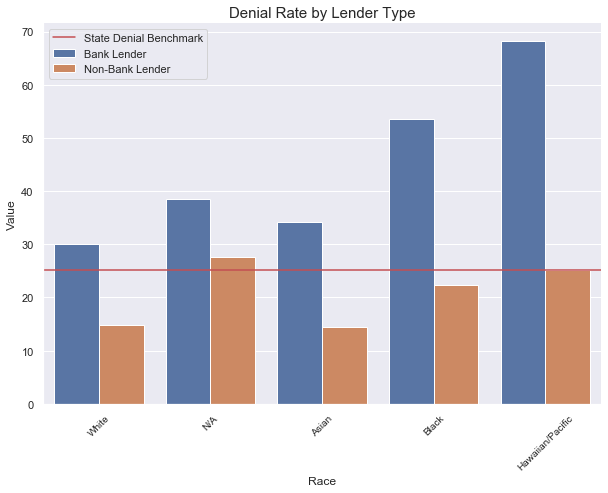

In [76]:
approval_race_df = pd.DataFrame({
    'Race': list(bank_race_dict.keys()),
    'Bank Lender': list(bank_race_dict.values()),
    'Non-Bank Lender': list(non_bank_race_dict.values())
})
fig, ax1 = plt.subplots(figsize=(10, 7))
tidy = approval_race_df.melt(id_vars='Race').rename(columns=str.title)
sns.barplot(x='Race', y='Value', hue='Variable', data=tidy, ax=ax1)
sns.despine(fig)
plt.axhline(y=bench_mark, color='r', linestyle='solid', label='State Denial Benchmark')
plt.legend()
plt.xticks(rotation=45, fontsize=10);
plt.title('Denial Rate by Lender Type',fontsize=15);

**Observation:** This chart illustrates that regardless of race, bank lenders deny applicants at a rate that is higher than the state average. On the other hand, we see that non-bank lenders deny all races at a rate under the state average with exception to race listed as "Other". Earlier in our analysis, we examined overall approval and denial rates between bank lenders and non-bank lenders that showed us bank lenders denied 30.9% of all applicants and non-bank lenders denying 16.6%. Using this information, we can see that some races such as White or Asian typically adhere to this distribution. However, for Black applicants, we see their denial rates for both types of lenders is substantially higher. Black aplicants were denied by bank lenders at a 53.63% rate compared to their overall 30.9%. Non-bank lenders denied 22.32% of Blacks compared to their 16.6% overall denial rate. What we can deduce from this is given a Black applicant, their chances of denial are doubled given they finance with a bank lender. The disparity between Black denial rates and overall denial rates for each lender type highlights the stark differences between bank lenders and non-bank lenders. For instance, bank lenders denied Black applicants at a rate. that is 23% higher than their average whereas non-bank lenders denied Blacks at a 6% higher rate. This shows that given an applicant's information, race, income, etc, there are clear advantages and disadvantages when choosing to finance with a bank lender of non-bank lender. 